In [18]:
%matplotlib inline

import matplotlib
import numpy, random, math
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

## Generating data

In [32]:
random.seed(123)

classA = numpy.concatenate((numpy.random.randn(10, 2)*0.2+[1.5, 0.5],
                            numpy.random.randn(10, 2)*0.2 + [-1.5, 0.5]))
classB = numpy.random.randn(20, 2)*0.2 +[0, -0.5]

inputs = numpy.concatenate((classA, classB))

targets = numpy.concatenate((numpy.ones(classA.shape[0]),
                             -numpy.ones(classB.shape[0])))

N = inputs.shape[0] ## Number of rows ie. samples

##Randomly order data
permute = list(range(N))
random.shuffle(permute)
inputs = inputs[permute, :]
targets = targets[permute]

## Kernel functions

In [14]:
def linearKernel(x, y):
    return numpy.dot(numpy.transpose(x), y) + 1

def quadraticKernel(x, y):
    return (numpy.dot(numpy.transpose(x), y)+1)**2

sigma = 4

def rbfKernel(x, y):
    d = np.substract(x, y)
    temp = -(numpy.dot(d, d)/(2*np.power(sigma, 2)))
    return numpy.exp(temp)

print(inputs)

[[ 0.15449047 -0.71453594]
 [ 0.08646717 -0.34833056]
 [ 1.42751416  0.46250116]
 [ 1.43162376  0.8152217 ]
 [ 1.83278221  0.5509133 ]
 [ 1.33349652  0.47870728]
 [ 1.43553833  0.55944382]
 [ 0.14974687 -0.45842092]
 [-0.01176186 -0.2832836 ]
 [-1.28529891  0.5856637 ]
 [ 0.00655745 -0.49294733]
 [ 0.1247806  -0.53852178]
 [-1.34218973  0.45343694]
 [ 1.58562569  0.32278781]
 [-0.53818283 -0.55366608]
 [-1.40826812  0.60082271]
 [-0.17654391 -0.73886775]
 [-1.59270642  0.35936805]
 [-1.40911098  0.38030062]
 [ 0.62018781 -0.617034  ]
 [ 0.05699547 -0.63950252]
 [-1.28252308  0.61021222]
 [-1.503896    0.72674472]
 [-0.10916138 -0.21005404]
 [-0.01636929 -0.32499242]
 [ 0.02083497 -0.69986125]
 [-0.47583147 -0.89002731]
 [ 1.29396156  0.40390923]
 [-0.24841895 -0.65461886]
 [-0.16351191 -0.61173222]
 [-0.51113708 -0.01545568]
 [-2.06702883 -0.15079851]
 [ 0.35092786 -0.69476786]
 [-0.38653123 -0.24128887]
 [ 1.33586378  0.56604199]
 [ 0.07114604 -0.45455208]
 [-1.31362879  0.66462952]
 

## SVM

In [27]:
##Building kernel-matrix
kernel = numpy.zeros((N, N))

for i in range(0, N):
    for j in range(0, N):
        kernel[i, j] = linearKernel([(inputs[i])[0], (inputs[i])[1]],[(inputs[j])[0], (inputs[j])[1]])

P = numpy.outer(targets, targets)*kernel

##Objective function
def objective(a):
    temp = 0
    for i in range(N):
        for j in range(N):
            temp += 0.5*a[i]*a[j]*P
    temp -= numpy.sum(a)
    return temp

##Check whether matrix is symmetric
def check_symmetric(a, tol=1e-8):
    return numpy.allclose(a, a.T, atol=tol)

print(check_symmetric(P))

True


## Using framework SKLearn

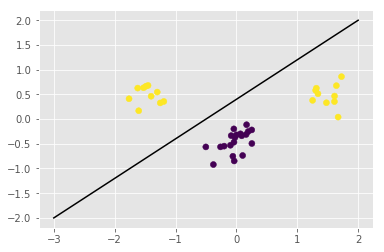

In [33]:
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(inputs, targets)

w = clf.coef_[0]
print(w)

a = -w[0]/w[1]

##Plotting decision boundary
xx = numpy.linspace(-3, 2)
yy = numpy.linspace(-2, 2)

h0 = plt.plot(xx, yy, 'k-', label='SVM boundaries')

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets)


## Plotting the data

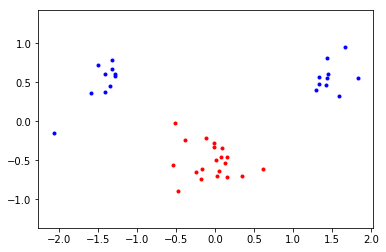

In [7]:
plt.plot([p[0] for p in classA],
         [p[1] for p in classA],
         'b. ')
plt.plot([p[0] for p in classB],
         [p[1] for p in classB],
         'r. ')

##Plotting decision boundary
xgrid = numpy.linspace(-5, 4)
ygrid = numpy.linspace(-4, 4)
grid = 

plt.contour (xgrid, ygrid ,grid, (−1.0, 0.0, 1.0), colors=(’red’, ’black’, ’blue’), linewidths=(1, 3, 1))

plt.axis('equal')
plt.show()